In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import random
%matplotlib inline
plt.style.use('ggplot')

def export_dataset(X,Y,file_name):
    ''' function to concatenate X and Y matrices and export as csv '''
    # check if pandas df, convert if not.
    if type(X) or type(Y) != 'pandas.core.frame.DataFrame':
        X = pd.DataFrame(X)
        Y = pd.DataFrame(Y)
    else:
        X,Y=X,Y
    # concatentate dataframes
    df_out = pd.concat([X,Y],axis=1)
    #export dataframe as csv
    df_out.to_csv(file_name)
    
    

## dataset gen test

In [25]:
X,Y = sklearn.datasets.make_classification(n_features=3,
                                           n_redundant=0,
                                           n_informative=3,
                                           n_clusters_per_class=1,
                                          class_sep=2,
                                          random_state=3)

X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

print X_df.shape,Y_df.shape
print X_df.describe()

(100, 3) (100, 1)
                0           1           2
count  100.000000  100.000000  100.000000
mean    -0.202053    1.795131    2.033123
std      2.400256    1.053971    0.709990
min     -4.627231   -0.640844   -0.713629
25%     -2.155788    1.042628    1.689653
50%     -0.244117    1.919639    2.014050
75%      1.981938    2.381972    2.438141
max      5.016596    4.292799    3.638362


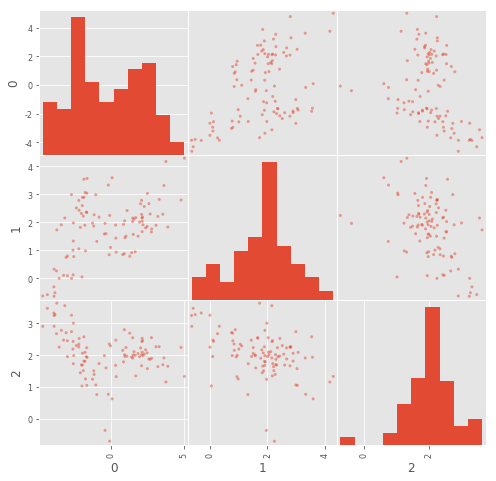

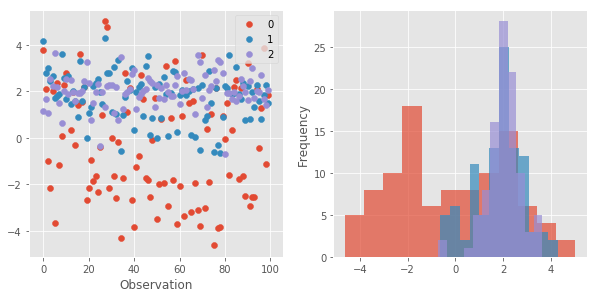

In [26]:
''' coor plot '''

pd.plotting.scatter_matrix(X_df,figsize=(8,8))

fig = plt.figure(figsize=(10,10))
''' scatter '''
#ax = plt.subplot(221)
#plt.scatter(X_df.iloc[:,0],X_df.iloc[:,1],c=Y_df.iloc[:,0])

''' scatter '''
plt.subplot(223)
for i in X_df:
    x = range(len(X_df))
    y = X_df[i]
    plt.scatter(x=x,y=y,label=i)
plt.legend()
plt.xlabel('Observation')

''' histogram '''
plt.subplot(224)
for i in X_df:
    X_df[i].plot.hist(alpha=0.7,bins=12)


# Case 1: Highly Correlated

In [27]:
X,Y = sklearn.datasets.make_classification(n_samples=100,
                                        n_features=10,
                                           n_redundant=7,
                                           n_informative=2,
                                           n_clusters_per_class=1,
                                          class_sep=1.5,
                                          random_state=3)

X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

print X_df.shape,Y_df.shape
print X_df.describe()

''' export to csv '''
#export_dataset(X_df,Y_df,'high_corr.csv')

(100, 10) (100, 1)
                0           1           2           3           4           5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    -1.360263    0.992406    0.077888    1.225406    0.539836    1.001661   
std      1.318208    1.173826    1.075751    1.930550    0.407582    0.770226   
min     -6.051808   -0.664546   -2.890031   -2.949135   -0.385864   -0.706390   
25%     -2.211842   -0.015093   -0.619775   -0.015129    0.245307    0.461386   
50%     -1.235041    0.720334    0.127511    0.950196    0.507763    0.941068   
75%     -0.629195    1.886473    0.697218    2.517855    0.766793    1.451520   
max      1.832012    4.140986    2.303401    7.466339    1.791307    3.370695   

                6           7           8           9  
count  100.000000  100.000000  100.000000  100.000000  
mean     0.031128    1.536459   -0.981194   -1.475652  
std      1.634311    1.110376    1.115360    1.091533  
min     -3.508091   -1.2541

' export to csv '

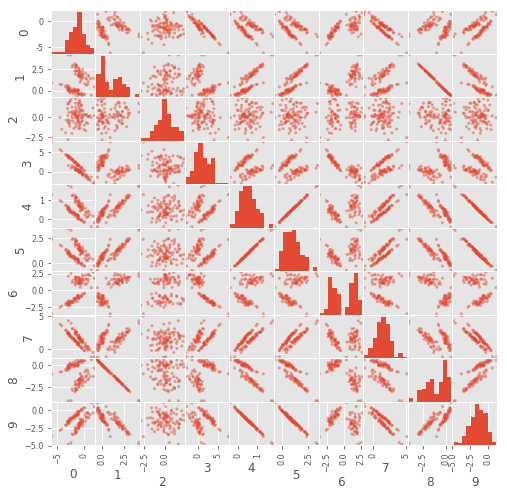

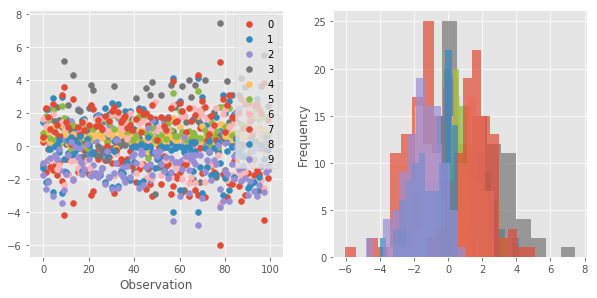

In [28]:
''' coor plot '''

pd.plotting.scatter_matrix(X_df,figsize=(8,8))

fig = plt.figure(figsize=(10,10))
''' scatter '''
#ax = plt.subplot(221)
#plt.scatter(X_df.iloc[:,0],X_df.iloc[:,1],c=Y_df.iloc[:,0])

''' scatter '''
plt.subplot(223)
for i in X_df:
    x = range(len(X_df))
    y = X_df[i]
    plt.scatter(x=x,y=y,label=i)
plt.legend()
plt.xlabel('Observation')

''' histogram '''
plt.subplot(224)
for i in X_df:
    X_df[i].plot.hist(alpha=0.7,bins=12)


# Case 2: P>>N

In [29]:
X,Y = sklearn.datasets.make_classification(n_samples=10,
                                        n_features=15,
                                           n_redundant=0,
                                           n_informative=3,
                                           n_clusters_per_class=1,
                                          class_sep=2,
                                          random_state=3)

X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

print X_df.shape,Y_df.shape
print X_df.describe()

''' export dataset '''
#export_dataset(X,Y,'bigP_littleN.csv')

(10, 15) (10, 1)
              0          1          2          3          4          5   \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean   -0.100197   2.000148  -0.664811   0.348185   0.557589   0.543470   
std     0.926340   1.384654   1.024791   0.843800   1.088979   1.032814   
min    -1.733456  -0.841659  -2.769837  -0.983713  -0.590393  -0.563266   
25%    -0.685222   1.443053  -1.124419   0.031865  -0.166487  -0.175138   
50%    -0.138321   1.999304  -0.496969   0.276803   0.340317   0.352678   
75%     0.569089   2.935798  -0.215769   0.863571   0.748758   0.862446   
max     1.273238   4.145317   0.637151   1.596164   2.778283   3.048171   

              6          7          8          9          10         11  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean   -0.394741   0.292927  -0.113149   0.599165  -0.223483  -0.319899   
std     0.733067   1.394126   1.323890   1.824841   1.176639   1.268719   
min    

' export dataset '

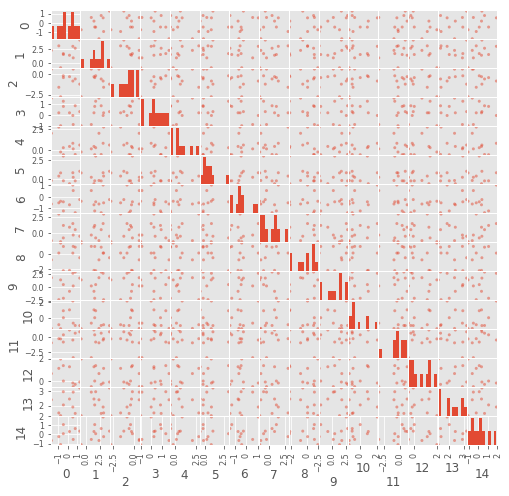

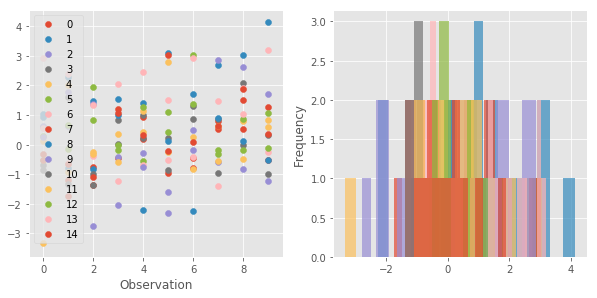

In [30]:
''' coor plot '''
pd.plotting.scatter_matrix(X_df,figsize=(8,8))

fig = plt.figure(figsize=(10,10))
''' scatter '''
#ax = plt.subplot(221)
#plt.scatter(X_df.iloc[:,0],X_df.iloc[:,1],c=Y_df.iloc[:,0])

''' scatter '''
plt.subplot(223)
for i in X_df:
    x = range(len(X_df))
    y = X_df[i]
    plt.scatter(x=x,y=y,label=i)
plt.legend()
plt.xlabel('Observation')

''' histogram '''
plt.subplot(224)
for i in X_df:
    X_df[i].plot.hist(alpha=0.7,bins=12)


# Case 3: Non-Normal Distributed Data

In [114]:
np.random.seed(15)
skew_r = np.random.noncentral_chisquare(df = 1,
                                     nonc = 2,
                                     size =(100,2))
skew_l = np.random.noncentral_chisquare(df = 4,
                                       nonc = 2,
                                       size=(100,2))
data_r = pd.DataFrame(skew_r)
data_l = pd.DataFrame(skew_l)*-1.+skew_l.max()
#data_l.columns=(['5','6','7','8','9'])


X = pd.concat([data_r,data_l],axis=0)
X = X.reset_index()[[0,1]]
Y = pd.DataFrame()
Y_0 = [0]*(len(X)/2)
Y_1 = [1]*(len(X)/2)
Y['target'] = Y_0 + Y_1
df_skewed = pd.concat([X,Y],axis=1)
print X.info()

''' export dataset '''
X.to_csv('skewed_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
0    200 non-null float64
1    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [115]:
df_skewed

,0,1,target
0,2.012477,1.408541,0
1,0.124899,1.235433,0
2,1.998753,7.778330,0
3,0.582982,6.617637,0
4,0.371040,0.662692,0
5,2.330021,0.076382,0
6,1.586059,2.203672,0
7,1.877747,5.936291,0
8,3.248996,3.940114,0
9,0.604930,0.685031,0


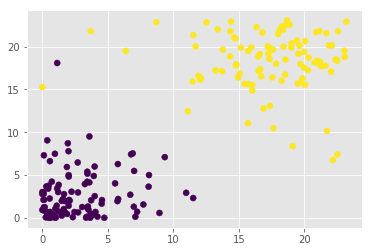

In [119]:
plt.scatter(x=df_skewed[0],y=df_skewed[1],c=df_skewed['target'])

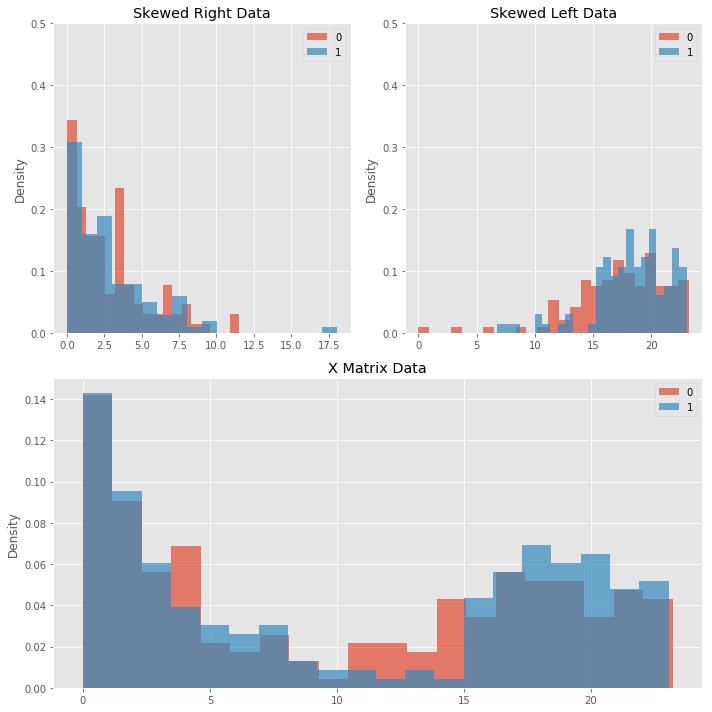

In [113]:
''' skewed right hist'''
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(221)
for i in data_r:
    data = data_r[i]
    plt.hist(x=data, bins=18,
             label=str(i),
            alpha=0.7,density=True)
    plt.ylim(0,.5)
    plt.ylabel('Density')
    plt.title('Skewed Right Data')
    plt.legend()

''' skewed left hist '''
ax = plt.subplot(222)
for i in data_l:
    data = data_l[i]
    plt.hist(x=data, bins=25,
             label=str(i),
            alpha=0.7,density=True)
    plt.ylim(0,.5)
    plt.ylabel('Density')
    plt.title('Skewed Left Data')
    plt.legend()

''' corr plot '''
#pd.plotting.scatter_matrix(X_df,figsize=(8,8))

''' X matrix hist '''
plt.subplot(212)
for i in X:
    if i != 'index':
        plt.hist(X[i],density=True,bins=20,alpha=0.7,label=str(i))
plt.title('X Matrix Data')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

# Case 4: Class imbalance

In [38]:
X,Y = sklearn.datasets.make_classification(n_samples=100,
                                        n_features=5,
                                           n_redundant=0,
                                           n_informative=5,
                                           n_clusters_per_class=1,
                                          class_sep=2,
                                          random_state=3)

X_df, Y_df = pd.DataFrame(X), pd.DataFrame(Y)
Y_df.columns=(['K'])
df_master = pd.concat((X_df,Y_df),axis=1)

''' how many of class 1 to keep? '''
ones_to_keep = .25*len(Y_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2355b650>]],
      dtype=object)

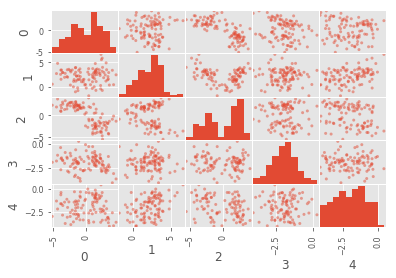

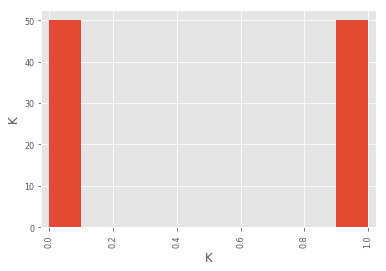

In [39]:
pd.plotting.scatter_matrix(X_df)
pd.plotting.scatter_matrix(Y_df)

In [40]:
''' keep n numbers of randomized class one as defined in ones_to_keep'''
count = 0
ones_ind = df_master[df_master['K']==1].index.values
print ones_ind[:10] 
np.random.shuffle(ones_ind)
print ones_ind[:10]

ones_keep = []
for i in ones_ind:
    if count <= ones_to_keep:
        ones_keep.append(i)
        count += 1

df_master = df_master.drop(ones_keep,axis=0)
print df_master.shape
df_master
    
#df_master.to_csv('class_imbalance.csv')


[ 6  7  9 14 16 18 19 20 21 22]
[21 54 62 86 58 33 14 88 18 92]
(74, 6)


,0,1,2,3,4,K
0,-1.938008,0.018710,2.473312,-1.662811,-3.631903,0
1,-1.778456,2.580627,2.114083,-3.381062,-0.347069,0
2,-3.871406,3.441151,2.265550,-2.673167,-0.678143,0
3,-2.827903,1.983832,2.504393,-2.815176,-2.053614,0
4,-1.131883,3.382464,2.096101,0.270960,-2.857909,0
5,-1.830856,1.502790,1.641543,-2.522260,-1.480816,0
7,0.985768,1.058901,-1.135501,-1.800044,-1.730200,1
8,-2.633032,3.599143,2.794626,-2.926423,-1.450494,0
9,2.536811,3.998248,-5.565096,-1.791657,-2.503892,1
10,-0.317823,1.554166,1.705618,-1.825115,-2.658097,0


Text(0.5,1,'Distribution of Class')

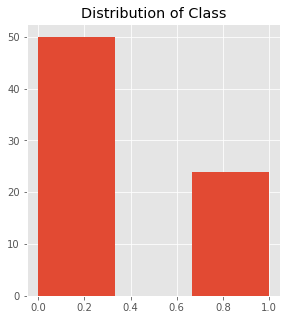

In [41]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(df_master['K'],
         bins=3)
plt.title('Distribution of Class')

### Read Test

In [44]:
class_imb = pd.read_csv('class_imbalance.csv')
print class_imb.head()
print class_imb.shape

   Unnamed: 0         0         1         2         3         4  K
0           0 -1.938008  0.018710  2.473312 -1.662811 -3.631903  0
1           1 -1.778456  2.580627  2.114083 -3.381062 -0.347069  0
2           2 -3.871406  3.441151  2.265550 -2.673167 -0.678143  0
3           3 -2.827903  1.983832  2.504393 -2.815176 -2.053614  0
4           4 -1.131883  3.382464  2.096101  0.270960 -2.857909  0
(74, 7)
